In [1]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

## Gradient Norm Investigation
> The current uploaded files only have avg client loss, the client loss log from each fold for each client, and the client gradient log from each fold for each client. Eg, no cost func components and no client model log.

In [2]:
cv_results_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\PythonVersion\PythonSimsRevamp\results\WithGradNorm_SR3"

cross_nofl_dir = "08-27_17-50_NOFL"
cross_fedavg_dir = "08-27_19-46_FEDAVG"
cross_pfa_dir = "08-27_19-53_PFAFO_GDLS"
intra_nofl_dir = "08-27_19-57_NOFL"
intra_fedavg_dir = "08-27_19-59_FEDAVG"
intra_pfa_dir = "08-27_20-00_PFAFO_GDLS"

nofl_filename = "FULLSCIPYMIN_NOFL_CrossValResults.h5" 
fedavg_filename = "GDLS_FEDAVG_CrossValResults.h5"
pfa_filename = "GDLS_PFAFO_GDLS_CrossValResults.h5"

cross_nofl_h5_path = os.path.join(cv_results_path, cross_nofl_dir, nofl_filename)
cross_fedavg_h5_path = os.path.join(cv_results_path, cross_fedavg_dir, fedavg_filename)
cross_pfa_h5_path = os.path.join(cv_results_path, cross_pfa_dir, pfa_filename)
intra_nofl_h5_path = os.path.join(cv_results_path, intra_nofl_dir, nofl_filename)
intra_fedavg_h5_path = os.path.join(cv_results_path, intra_fedavg_dir, fedavg_filename)
intra_pfa_h5_path = os.path.join(cv_results_path, intra_pfa_dir, pfa_filename)

paths_lst = [cross_nofl_h5_path, cross_fedavg_h5_path, cross_pfa_h5_path, intra_nofl_h5_path, intra_fedavg_h5_path, intra_pfa_h5_path]

cross_nofl_gradient_log = []
cross_fedavg_gradient_log = []
cross_pfa_gradient_log = []
intra_nofl_gradient_log = []
intra_fedavg_gradient_log = []
intra_pfa_gradient_log = []

grad_log_lst = [cross_nofl_gradient_log, cross_fedavg_gradient_log, cross_pfa_gradient_log, intra_nofl_gradient_log, intra_fedavg_gradient_log, intra_pfa_gradient_log]


0
1
2
3
4
5


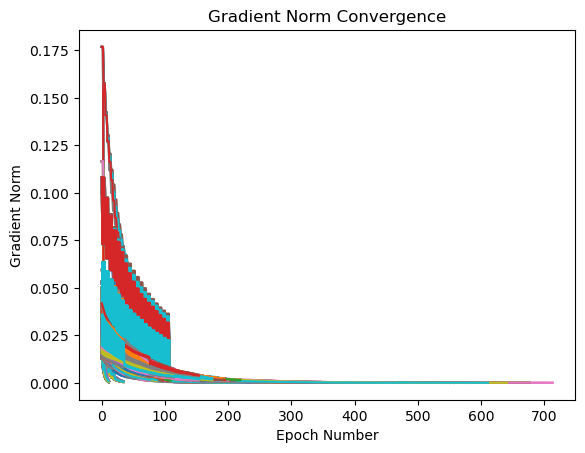

In [5]:
for idx, path in enumerate(paths_lst):
    print(idx)
    with h5py.File(path, 'r') as f:
        a_group_key = list(f.keys())#[0]
        for key in a_group_key:
            if "gradient" in key:
                grad_log_lst[idx].append(f[key][()])

    for i in range(len(grad_log_lst[idx])):
        plt.plot(grad_log_lst[idx][i])

plt.title("Gradient Norm Convergence")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

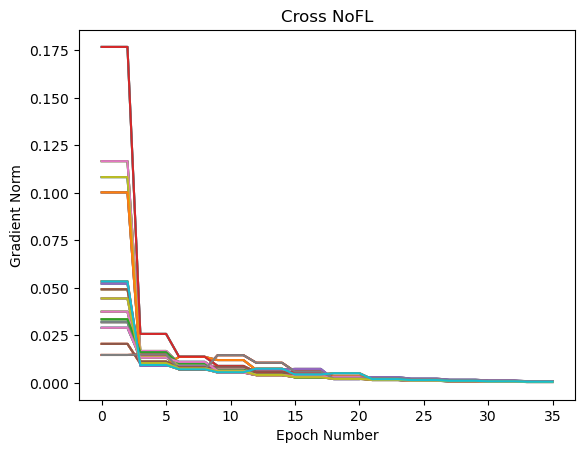

In [4]:
for i in range(len(grad_log_lst[0])):
    plt.plot(grad_log_lst[0][i])

plt.title("Cross NoFL")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

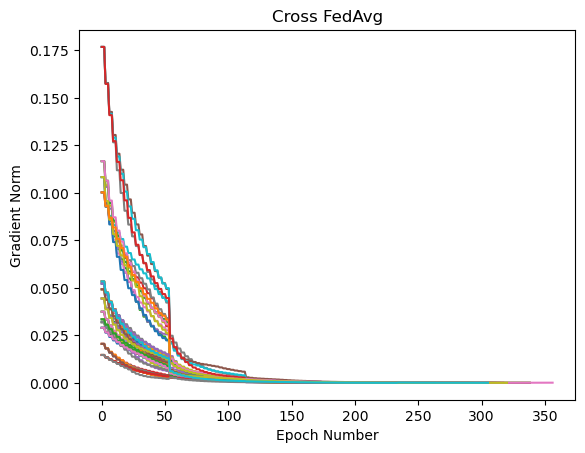

In [13]:
for i in range(len(grad_log_lst[1])):
    plt.plot(grad_log_lst[1][i])

plt.title("Cross FedAvg")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

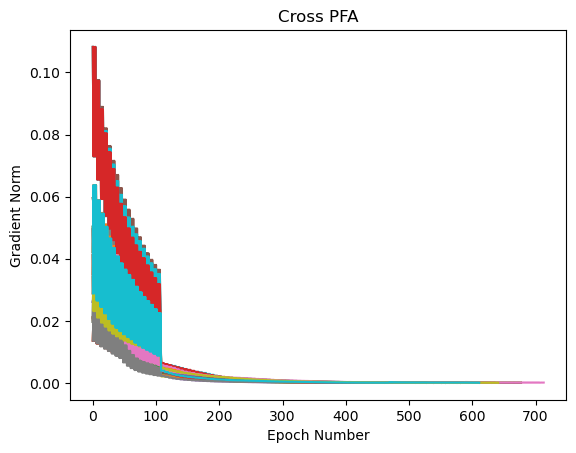

In [14]:
for i in range(len(grad_log_lst[2])):
    plt.plot(grad_log_lst[2][i])

plt.title("Cross PFA")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

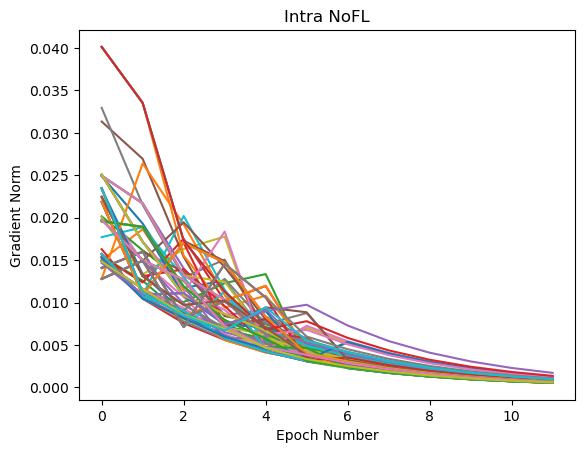

In [15]:
for i in range(len(grad_log_lst[3])):
    plt.plot(grad_log_lst[3][i])

plt.title("Intra NoFL")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

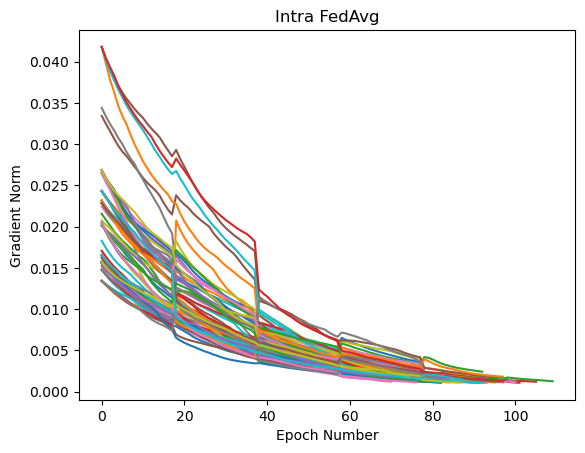

In [16]:
for i in range(len(grad_log_lst[4])):
    plt.plot(grad_log_lst[4][i])

plt.title("Intra FedAvg")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

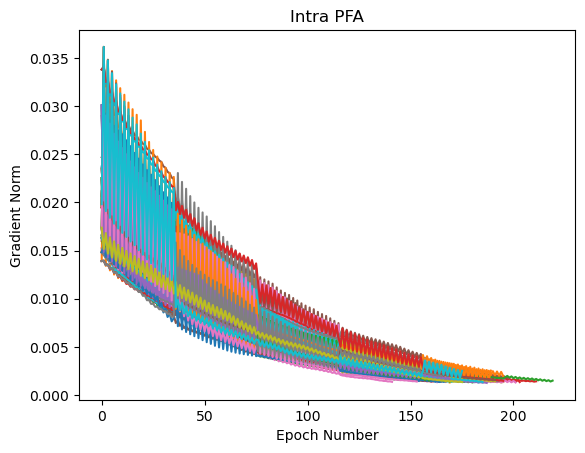

In [17]:
for i in range(len(grad_log_lst[5])):
    plt.plot(grad_log_lst[5][i])

plt.title("Intra PFA")
plt.ylabel("Gradient Norm")
plt.xlabel("Epoch Number")
plt.show()

> All gradients appear to converge basically to 0... although idk what the scale of the weights are so maybe the gradient norms are still relatively big? Clearly are monotonously decreasing though.

## Model Parameter Convergence / Distances
> Check to see if everything converges to the same final model...

In [1]:
cv_models_path = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\PythonVersion\PythonSimsRevamp\models\WithGradNorm_SR3"

cross_fedavg_dir = "08-27_19-45_FedAvg"
cross_pfa_dir = "08-27_19-49_PFAFO_GDLS"
intra_fedavg_dir = "08-27_19-58_FedAvg"
intra_pfa_dir = "08-27_20-00_PFAFO_GDLS"

model_name_str = ["servers_final_model_fold"]
model_dirs_lst = [cross_fedavg_dir, cross_pfa_dir, intra_fedavg_dir, intra_pfa_dir]

In [9]:
NUM_FOLDS = 5

In [10]:
all_models_lst = []
for model_dir in model_dirs_lst:
    print(model_dir)
    for idx in range(NUM_FOLDS):
        fold_idx = idx % 5  # This will cycle fold_idx from 0 to 4
        print(f"Fold {fold_idx}")
        file_path = os.path.join(cv_models_path, model_dir, f"{model_name_str}{fold_idx}.npy")
        all_models_lst.append(np.load(file_path))
    print()

08-27_19-45_FedAvg
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4

08-27_19-49_PFAFO_GDLS
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4

08-27_19-58_FedAvg
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4

08-27_20-00_PFAFO_GDLS
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4



In [11]:
len(all_models_lst)

20

In [12]:
all_models_lst[0].shape

(2, 64)

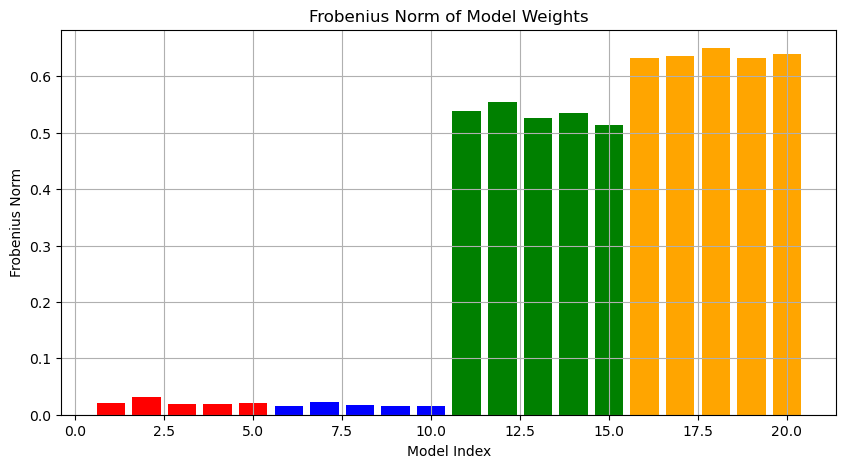

In [22]:
def plot_bar_model_norms(model_weights_list):
    norms = [np.linalg.norm(weights, ord='fro') for weights in model_weights_list]

    colors = ['red', 'blue', 'green', 'orange']  # Add more colors if necessary
    trial_colors = [colors[i // 5] for i in range(20)]  # Assign colors based on index
    
    # Plotting the norms as a bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, len(model_weights_list) + 1), norms, color=trial_colors)
    plt.xlabel('Model Index')
    plt.ylabel('Frobenius Norm')
    plt.title('Frobenius Norm of Model Weights')
    plt.grid(True)
    plt.show()

plot_bar_model_norms(all_models_lst)


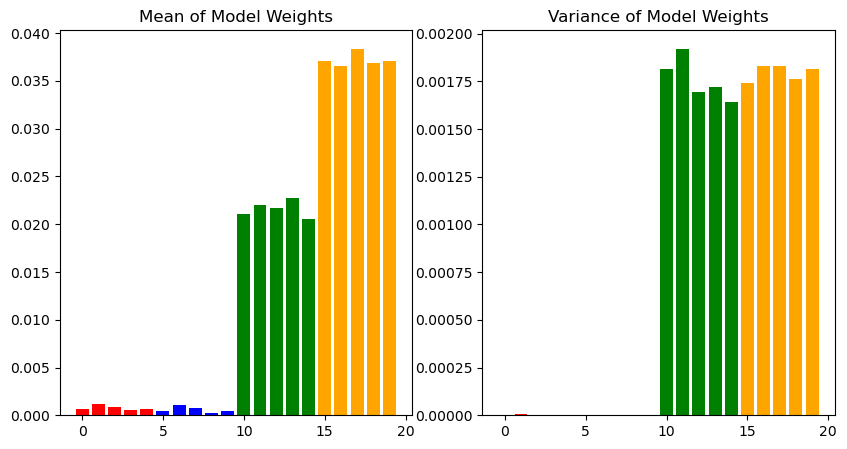

In [23]:
def plot_stat_summary(model_weights_list):
    means = [weights.mean() for weights in model_weights_list]
    variances = [weights.var() for weights in model_weights_list]

    colors = ['red', 'blue', 'green', 'orange']  # Add more colors if necessary
    trial_colors = [colors[i // 5] for i in range(20)]  # Assign colors based on index

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(means)), means, color=trial_colors)
    plt.title('Mean of Model Weights')
    plt.subplot(1, 2, 2)
    plt.bar(range(len(variances)), variances, color=trial_colors)
    plt.title('Variance of Model Weights')
    plt.show()

# Plot statistical summaries
plot_stat_summary(all_models_lst)


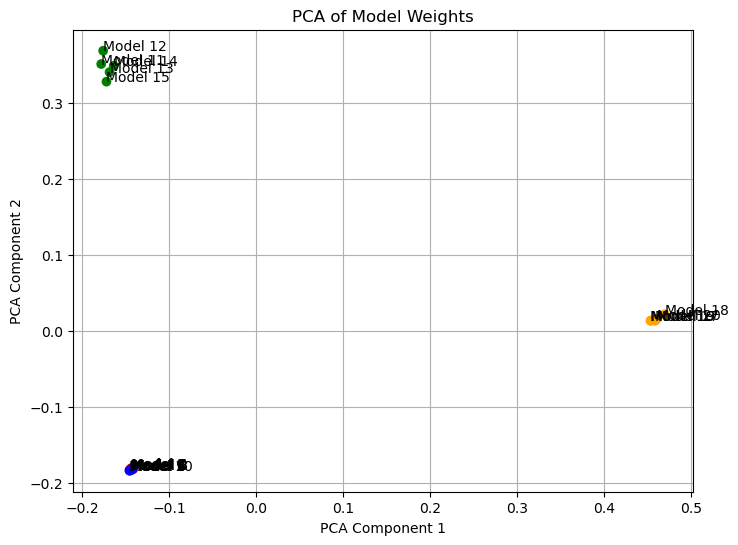

In [24]:
from sklearn.decomposition import PCA

def plot_pca(model_weights_list):
    weights_flattened = [weights.flatten() for weights in model_weights_list]
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(weights_flattened)

    colors = ['red', 'blue', 'green', 'orange']  # Add more colors if necessary
    trial_colors = [colors[i // 5] for i in range(20)]  # Assign colors based on index

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', c=trial_colors)
    for i in range(len(model_weights_list)):
        plt.text(pca_result[i, 0], pca_result[i, 1], f'Model {i+1}')
    plt.title('PCA of Model Weights')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Perform PCA and visualize
plot_pca(all_models_lst)


In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have a list of model weights (each a (2, 64) matrix) as model_weights_list

def perform_pca_and_clustering(model_weights_list, n_clusters=3):
    # Flatten the (2, 64) model weight matrices into 1D vectors
    flattened_weights = [weights.flatten() for weights in model_weights_list]
    
    # Perform PCA to reduce dimensionality to 2D for visualization and clustering
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(flattened_weights)
    
    # Apply K-Means clustering on the PCA-transformed data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_transformed)
    
    # Print cluster assignments for each model
    for idx, cluster in enumerate(cluster_labels):
        print(f"Model {idx+1} belongs to Cluster {cluster + 1}")
    
    # Return PCA-transformed data and cluster labels (optional)
    return pca_transformed, cluster_labels

# Example usage
pca_transformed, cluster_labels = perform_pca_and_clustering(all_models_lst, n_clusters=3)


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model 1 belongs to Cluster 1
Model 2 belongs to Cluster 1
Model 3 belongs to Cluster 1
Model 4 belongs to Cluster 1
Model 5 belongs to Cluster 1
Model 6 belongs to Cluster 1
Model 7 belongs to Cluster 1
Model 8 belongs to Cluster 1
Model 9 belongs to Cluster 1
Model 10 belongs to Cluster 1
Model 11 belongs to Cluster 3
Model 12 belongs to Cluster 3
Model 13 belongs to Cluster 3
Model 14 belongs to Cluster 3
Model 15 belongs to Cluster 3
Model 16 belongs to Cluster 2
Model 17 belongs to Cluster 2
Model 18 belongs to Cluster 2
Model 19 belongs to Cluster 2
Model 20 belongs to Cluster 2


C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


So PCA returns 3 clusters, the first being both INTRA cases, the second being CROSS FedAvg, and the third being CROSS PFA. Interesting that the PFA models may be different...

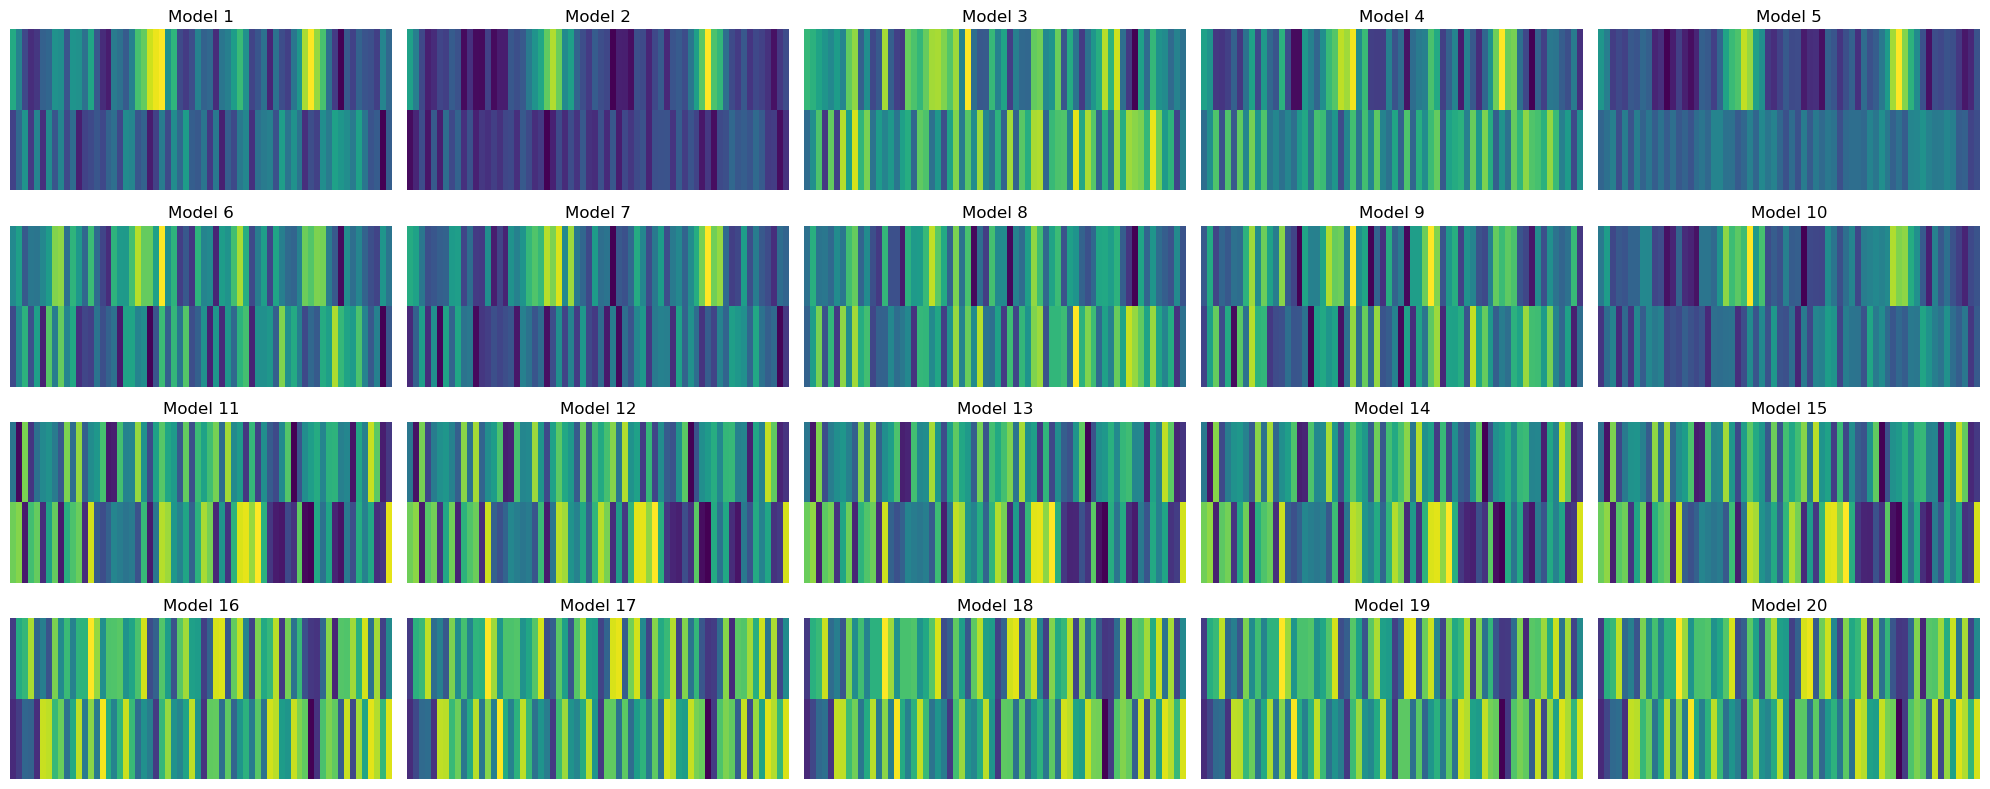

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(model_weights_list):
    num_models = len(model_weights_list)
    fig, axes = plt.subplots(4, 5, figsize=(20, 8))  # 4x5 grid for 20 models
    axes = axes.flatten()

    for i, weights in enumerate(model_weights_list):
        sns.heatmap(weights, ax=axes[i], cmap='viridis', cbar=False)
        axes[i].set_title(f'Model {i+1}')
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    plt.tight_layout()
    plt.show()

# Assuming `model_weights_list` is a list of 20 (2, 64) matrices
plot_heatmaps(all_models_lst)


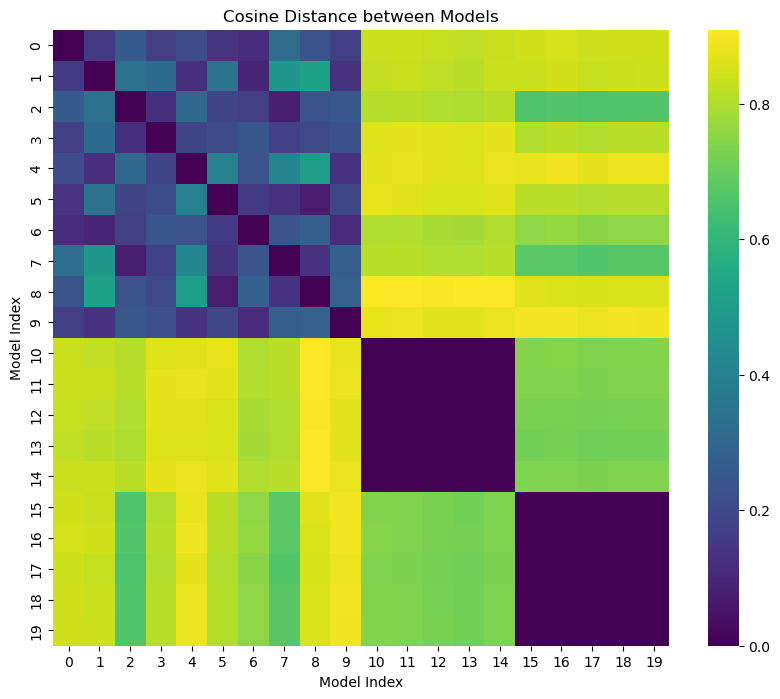

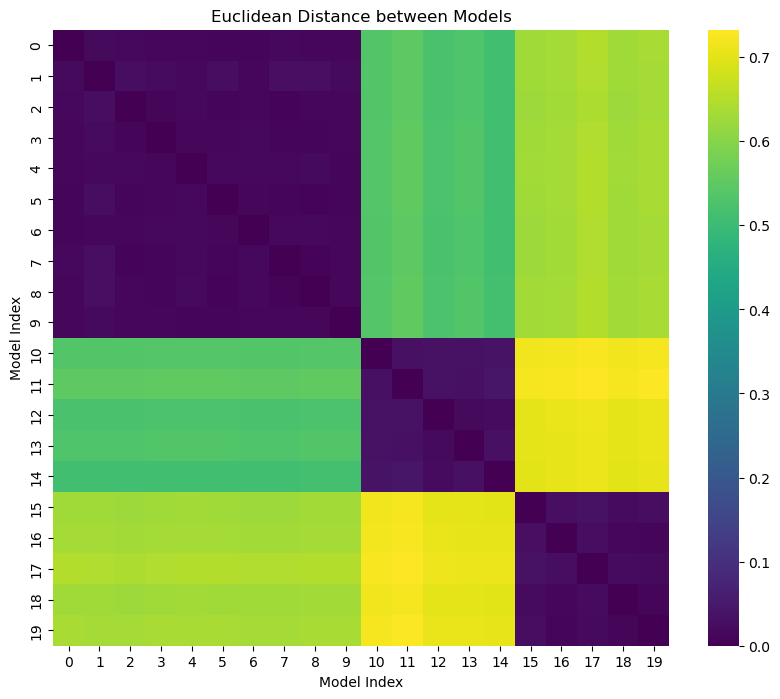

In [17]:
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_distance_heatmap(model_weights_list, distance_metric='cosine'):
    # Flatten the (2, 64) model weight matrices into 1D vectors
    flattened_weights = [weights.flatten() for weights in model_weights_list]
    
    # Calculate pairwise distances
    if distance_metric == 'cosine':
        distances = cosine_distances(flattened_weights)  # Cosine distance
    elif distance_metric == 'euclidean':
        distances = squareform(pdist(flattened_weights, metric='euclidean'))  # Euclidean distance
    
    # Plot heatmap of pairwise distances
    plt.figure(figsize=(10, 8))
    sns.heatmap(distances, annot=False, cmap='viridis', square=True, cbar=True)
    plt.title(f'{distance_metric.capitalize()} Distance between Models')
    plt.xlabel('Model Index')
    plt.ylabel('Model Index')
    plt.show()

# Assuming `model_weights_list` is a list of (2, 64) matrices
plot_distance_heatmap(all_models_lst, distance_metric='cosine')  # For cosine distance
plot_distance_heatmap(all_models_lst, distance_metric='euclidean')  # For Euclidean distance


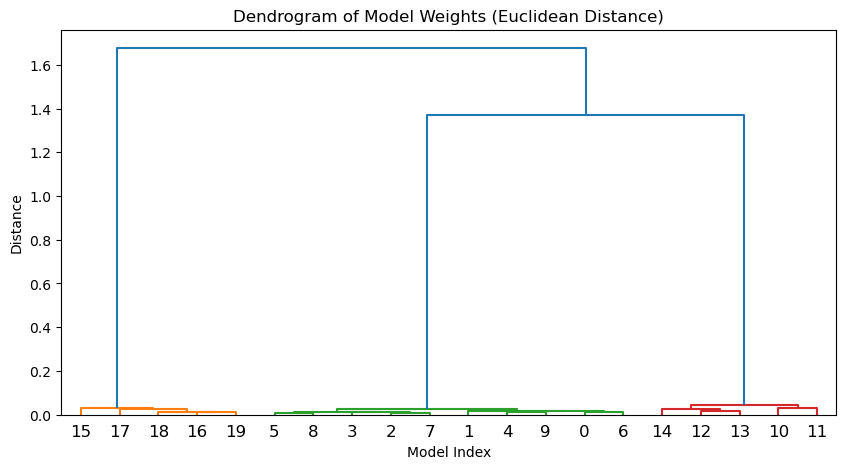

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model_weights_list, distance_metric='euclidean'):
    # Flatten the (2, 64) model weight matrices into 1D vectors
    flattened_weights = [weights.flatten() for weights in model_weights_list]
    
    # Compute the linkage matrix for hierarchical clustering
    Z = linkage(flattened_weights, method='ward', metric=distance_metric)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title(f'Dendrogram of Model Weights ({distance_metric.capitalize()} Distance)')
    plt.xlabel('Model Index')
    plt.ylabel('Distance')
    plt.show()

# Plot dendrogram using Euclidean distance (for example)
plot_dendrogram(all_models_lst, distance_metric='euclidean')
